In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [16]:
df = pd.read_csv("dataset/V2_PlatteRiverWeir_features_merged_all.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,...,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,RiverArea
0,0,0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47072.0
1,1,1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47545.0
2,2,2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48159.0
3,3,3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48141.0
4,4,4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48743.0


In [17]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['CaptureTime'] = pd.to_datetime(df['CaptureTime'])

In [18]:
df["Month"] = df['CaptureTime'].dt.month

### Get area, time and the values we want to predict

In [19]:
df_m = df[["Stage", "Discharge", "Month", "RiverArea"]]
df_m

,Stage,Discharge,Month,RiverArea
0,2.99,916.0,6,47072.0
1,2.99,916.0,6,47545.0
2,2.96,873.0,6,48159.0
3,2.94,846.0,6,48141.0
4,2.94,846.0,6,48743.0
...,...,...,...,...
42054,2.54,434.0,10,38366.0
42055,2.54,434.0,10,38641.0
42056,2.54,434.0,10,39500.0
42057,2.54,434.0,10,39716.0


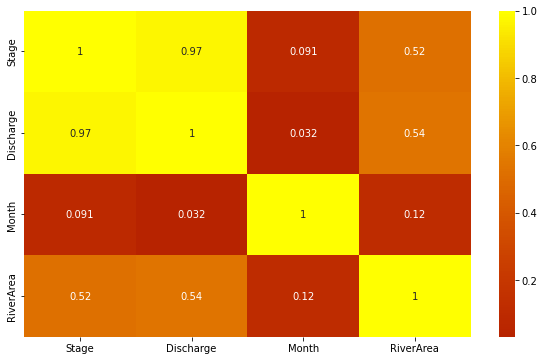

In [22]:
corr_pearson = df_m.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

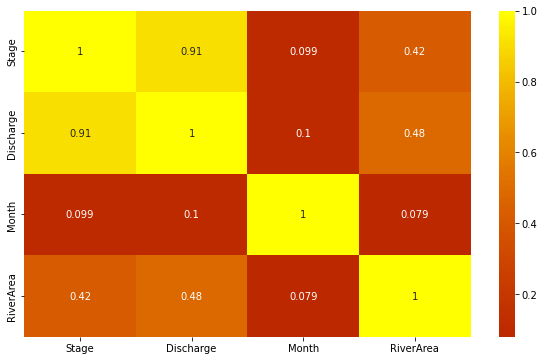

In [25]:
corr_ken = df_m.corr(method="kendall") # kendall correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_ken, annot=True, center=0, cmap='gnuplot')
plt.show()

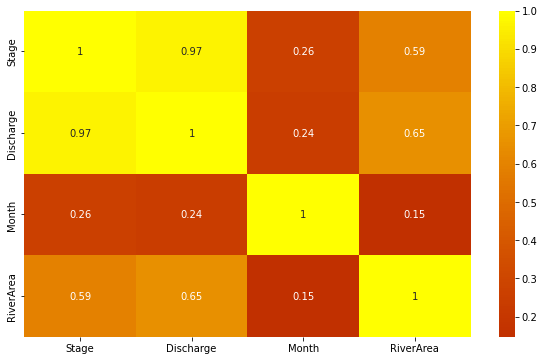

In [26]:
corr_spearman = df_m.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()